In [3]:
import os
import numpy as np
import seaborn as sns
from scipy.stats import norm
from matplotlib import pyplot as plt
%matplotlib inline

/sw/lib/python2.7/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
os.chdir('/Users/Erin/PycharmProjects/pydream/pydream/examples/mixturemodel/')

In [20]:
samples = [np.load('mixmod_mtdreamzs_3chain_sampled_params_chain_'+str(chain)+'.npy') for chain in range(3)]

In [21]:
samples = np.concatenate((samples[0][25000:,:], samples[1][25000:,:], samples[2][25000:,:]))

In [26]:
class BiModal():
    """For plotting two well-separated modes"""
    def __init__():
        pass
    
    def fit(self, data):
        data_bel_0 = data[data<0]
        fit1 = norm.fit(data_bel_0)
        data_above_0 = data[data>0]
        fit2 = norm.fit(data_above_0)
        return fit1+fit2
    
    def pdf(self, x, mu1, sd1, mu2, sd2):
        pd = np.zeros(x.shape)
        pd[x<0] = norm.pdf(x[x<0], loc=mu1, scale=sd1)
        pd[x>0] = norm.pdf(x[x>0], loc=mu2, scale=sd2)
        return pd

In [23]:
mode1_mu = np.array([-5]*10)
mode1_C = np.identity(10)
perfect_mode1_samples = np.random.multivariate_normal(mean=mode1_mu, cov=mode1_C, size=25000)
mode2_mu = np.array([5]*10)
mode2_C = np.identity(10)
perfect_mode2_samples = np.random.multivariate_normal(mean=mode2_mu, cov=mode2_C, size=50000)

In [24]:
perfect_samples = np.vstack((perfect_mode1_samples, perfect_mode2_samples))

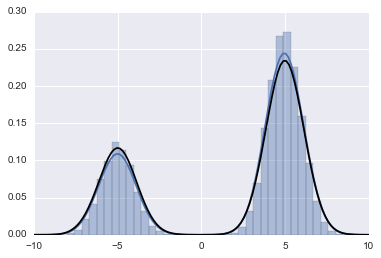

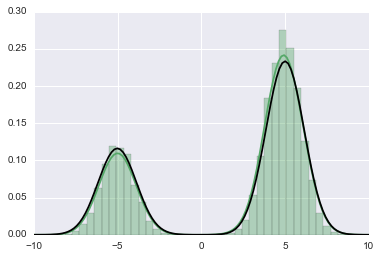

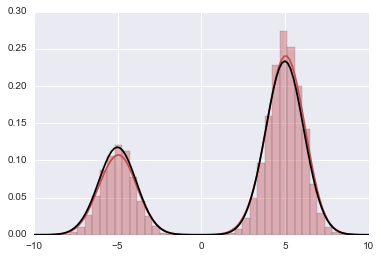

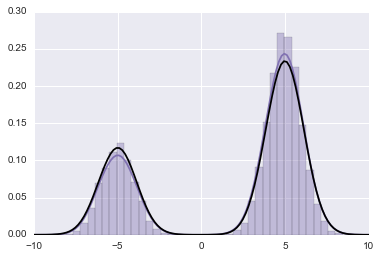

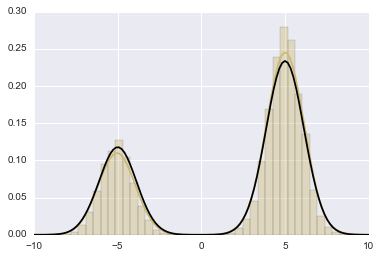

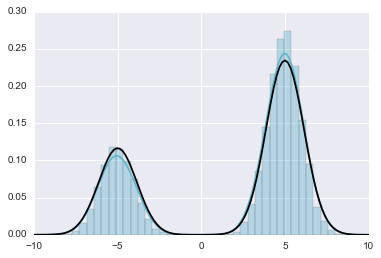

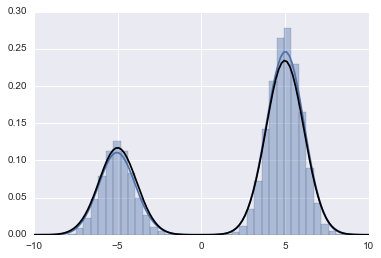

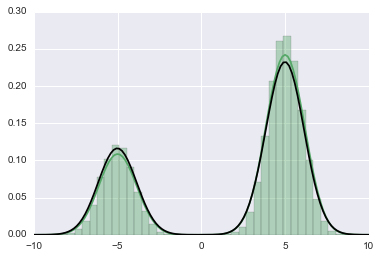

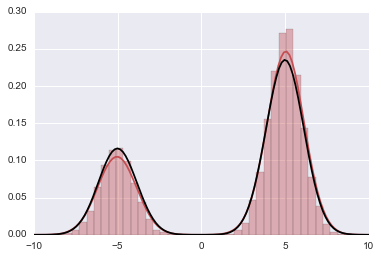

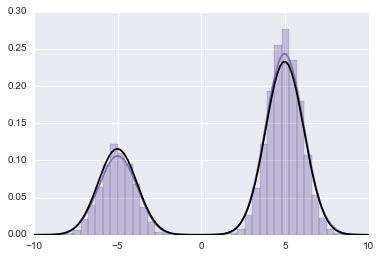

In [26]:
colors = sns.color_palette(n_colors=10)
for dim in range(10):
    fig = plt.figure()
    ax = sns.distplot(samples[:,dim], color=colors[dim])
    ax = sns.distplot(perfect_samples[:,dim], hist=False, color='k')
    plt.xlim([-10, 10])
    fig.savefig('mixture_model_appnoteplot_dim'+str(dim))